---
# Data Analysis and Machine Learning
---
## Assessment 01

An important topic in data science for healthcare is the prediction of possible cardiovascular disease without the need for invasive diagnostic procedures. Therefore, machine learning tools which can use information which is easy to measure to make accurate predictions of patient's risk of disease are becoming increasingly sought after.

You will be provided a data file containing a list of features about individual patients (***X***), and a second file containing two targets (***y***). Your task is to build two machine-learning models:
- a **classification model for predicting whether a patient has a high or low risk of cardiovascular disease**; the labels which contain this information are in the column `risk` of the variable `y`; high risk patients are assigned class 1, and low risk patients class 0.
- a **regression model for predicting the patient's maximum heart rate**; the labels which contain this information are in the column `max_heart_rate` of the variable `y`.

The full dataset contains 1189 examples. Each patient is described by a feature vector of 9 values, some of which are continuous and some of which are categorical. There are 2 target values to predict: `risk`, which contains class labels 1 and 0, and `max_heart_rate`, which contains a continuous target variable. A train/test (0.9/0.1) split has already been carried out and you only have access to the training dataset (containing 1070 examples). The testing dataset (containing the remaining 119 examples) is hidden - **you are not going to receive a copy of this.**

The data you need are provided in two .csv files in this part of the VLE:
- `x_train.csv`, containing 1070 examples with 9 features each (***X***).
- `y_train.csv`, containing 1070 examples with 2 targets each (***y***).

If you cannot get code to work, comment it out and write comments about what you are trying to do and how it fails. All code should generally be commented where appropriate as good practice dictates. When you have finished, use the option on the File menu to download this notebook as in .ipynb format and upload it to the submission point on the VLE. The criteria which will be used to mark your work are described in the [marking matrix](https://docs.google.com/document/d/1Gi3E3-DTsa9a7RFqKirvswaDw_mytXNDoF8Iy6YA3Lw/edit?tab=t.0#heading=h.b205rwm7jf5r).

Before you start, click the &#x25B8; icon below to allow colab to access the data files in your drive.

In [34]:
from google.colab import drive; drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


... and click the &#x25B8; icon below to import the `numpy` and `matplotlib.pyplot` libraries:

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### Task 01

Build and fit a classification model to predict a patient's risk class (high or low) using the feature vectors in `x_train.csv` as the input. The target (`risk`) is given in `y_train.csv`.

Evaluate your classification model using the accuracy, and optimise the hyperparameters of your classification model to obtain the best performance possible on unseen data.

You can use any classification model implemented in Scikit-Learn; you are not restricted to models that we have discussed in the lectures and associated workshops. Show evidence that you have:

- appropriately pre-processed your features.
- tested more than one classification model.
- optimised the hyperparameters of your chosen classification model.
- evaluated your chosen classification model on held-out data.
- investigated whether other evaluation metrics of your final model differ from the accuracy.

RandomForest Accuracy: 0.8598130841121495
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       111
         1.0       0.83      0.89      0.86       103

    accuracy                           0.86       214
   macro avg       0.86      0.86      0.86       214
weighted avg       0.86      0.86      0.86       214

Logistic Regression Accuracy: 0.7990654205607477
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       111
         1.0       0.77      0.83      0.80       103

    accuracy                           0.80       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.80      0.80      0.80       214

RandomForest selected as the best model.


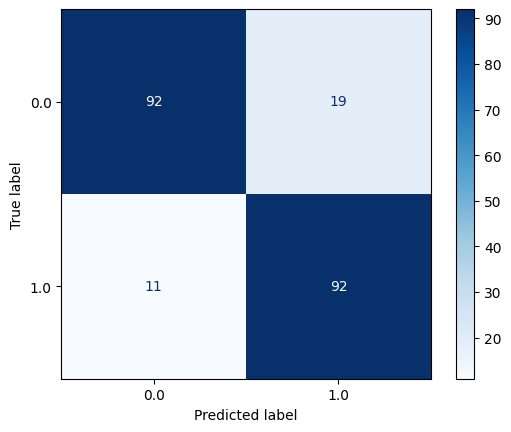

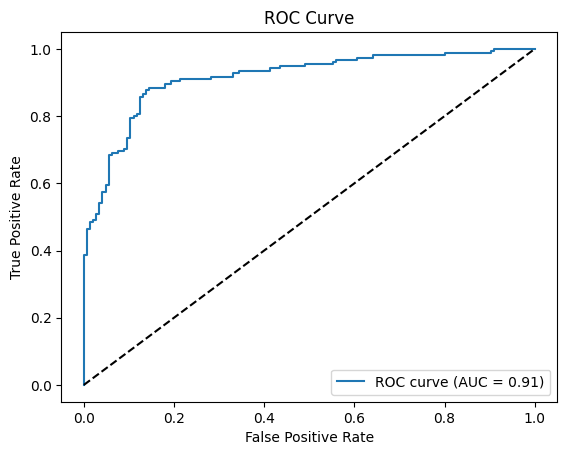

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc




# Now load the data
x_train = pd.read_csv('/content/drive/MyDrive/x_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train.csv')

# Separate features and target variable
X = x_train
y = y_train['risk']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Handle unseen categories in test data

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
rf_pipeline = Pipeline([('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Define hyperparameter grid for RandomForestClassifier
rf_param_grid = {'classifier__n_estimators': [100, 200],'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]}

# Perform GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Evaluate the best RandomForest model
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

# Lets print the best parameters
print(f"RandomForest Accuracy: {accuracy_rf}")
print(classification_report(y_val, y_pred_rf))


# Create a pipeline with Logistic Regression
lr_pipeline = Pipeline([('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))])  # Increased max_iter


lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)

# Now lets print the best parameters
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(classification_report(y_val, y_pred_lr))


# Select the best model based on validation accuracy (or other relevant metrics)
if accuracy_rf > accuracy_lr:
    best_model = rf_best_model
    print("RandomForest selected as the best model.")
else:
    best_model = lr_pipeline
    print("Logistic Regression selected as the best model.")
y_pred_best = best_model.predict(X_val)

  # Confusion matrix
cm = confusion_matrix(y_val, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues) # This line creates and displays the plot
plt.show() # This ensures the plot is shown in your output


#Generate some random data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

#Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a Logistic Regression model on the training data
model = LogisticRegression().fit(X_train, y_train)

#Get the probabilities of the positive class (class 1) for the test data
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

#Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')  # ROC curve with AUC value
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (represents random guessing)
plt.xlabel('False Positive Rate')  # Label for X-axis
plt.ylabel('True Positive Rate')  # Label for Y-axis
plt.title('ROC Curve')  # Title of the plot
plt.legend(loc='lower right')  # Position of the legend
plt.show()  # Display the plot

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

This code will load the hidden testing data from `x_test.csv` and `y_test.csv`, predict the class label using your model (assuming your model is assigned to the variable name `model`; **change the code below if you have used a different name!**), and evaluate the final model performance against the values in `y_test.csv` using the accuracy. Your performance on the hidden testing data is a graded component of the assessment.

Ensure that your final chosen model is complete, fit, and ready to predict after running the last block of code, as the block below will be run afterwards and is expected to run without error.

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

In [ ]:
# YOU WILL NOT BE ABLE TO RUN THIS CODE!

from sklearn.metrics import accuracy_score

x_test = np.genfromtxt('x_test.csv', delimiter = ',')
y_test = np.genfromtxt('y_test.csv', delimiter = ',')

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)

print(f'Final Accuracy: {accuracy:.6f}')

FileNotFoundError: x_test.csv not found.

### Task 02

Build and fit a regression model to predict a patient's maximum heart rate (`max_heart_rate` in `y_train.csv`) using the feature vectors in `x_train.csv` as the input. Evaluate your regression model using the mean absolute error (MAE), and optimise the hyperparameters of your regression model to obtain the best performance possible on unseen data.

You can use any regression model implemented in Scikit-Learn; you are not restricted to models that we have discussed in the lectures and associated workshops. Show evidence that you have:

- appropriately pre-processed your features.
- considered more than one regression model.
- optimised the hyperparameters of your chosen regression model.
- evaluated your chosen regression model on held-out data.

RandomForestRegressor MAE: 14.781506058716246
Linear Regression MAE: 17.18851145088288
RandomForestRegressor selected as the best model.
RandomForestRegressor selected as the best model.


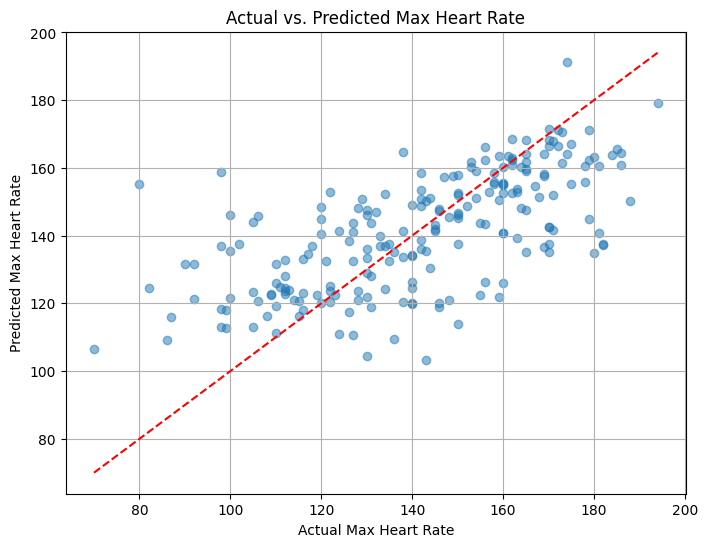

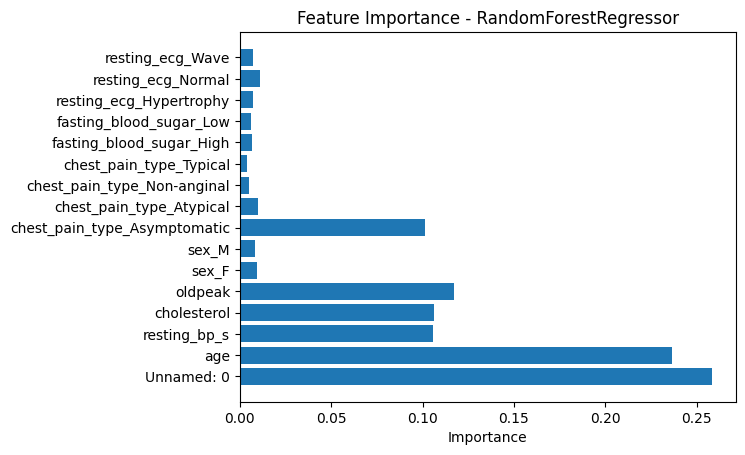

In [42]:

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Load the data
x_train = pd.read_csv('/content/drive/MyDrive/x_train.csv') #load the original x_train Data frame
y_train_df = pd.read_csv('/content/drive/MyDrive/y_train.csv') # Load the original y_train DataFrame


# Load the target variable for regression
y_reg = y_train_df['max_heart_rate'] # Access the 'max_heart_rate' column from the original DataFrame
# Use the original x_train DataFrame for regression
X_reg = x_train

# Split data into training and validation sets for regression
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestRegressor
rf_reg_pipeline = Pipeline([('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))])

# Define hyperparameter grid for RandomForestRegressor
rf_reg_param_grid = {'regressor__n_estimators': [100, 200],'regressor__max_depth': [None, 10, 20],}

# Perform GridSearchCV for hyperparameter tuning
rf_reg_grid_search = GridSearchCV(rf_reg_pipeline, rf_reg_param_grid, cv=5, scoring='neg_mean_absolute_error')
rf_reg_grid_search.fit(X_train_reg, y_train_reg)

# Evaluate the best RandomForestRegressor model
rf_reg_best_model = rf_reg_grid_search.best_estimator_
y_pred_rf_reg = rf_reg_best_model.predict(X_val_reg)
mae_rf_reg = mean_absolute_error(y_val_reg, y_pred_rf_reg)

# Lets print the best parameters
print(f"RandomForestRegressor MAE: {mae_rf_reg}")


# Create a pipeline with Linear Regression
lr_reg_pipeline = Pipeline([('preprocessor', preprocessor),('regressor', LinearRegression())])

lr_reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_lr_reg = lr_reg_pipeline.predict(X_val_reg)
mae_lr_reg = mean_absolute_error(y_val_reg, y_pred_lr_reg)

print(f"Linear Regression MAE: {mae_lr_reg}")

# Select the best model based on validation MAE
if mae_rf_reg < mae_lr_reg:
    best_reg_model = rf_reg_best_model

    print("RandomForestRegressor selected as the best model.")
else:
    best_reg_model = lr_reg_pipeline

# now print("Linear Regression selected as the best model.")
    print("Linear Regression selected as the best model.")
y_pred_reg_best = best_reg_model.predict(X_val_reg)



# Select the best regression model based on MAE
if mae_rf_reg < mae_lr_reg:
    best_reg_model = rf_reg_best_model
    print("RandomForestRegressor selected as the best model.")
else:
    best_reg_model = lr_reg_pipeline
    print("Linear Regression selected as the best model.")

# Predict on the validation set using the best model
y_pred_reg_best = best_reg_model.predict(X_val_reg)

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_val_reg, y_pred_reg_best, alpha=0.5)  # Plot actual vs. predicted
plt.xlabel("Actual Max Heart Rate")
plt.ylabel("Predicted Max Heart Rate")
plt.title("Actual vs. Predicted Max Heart Rate")
plt.plot([min(y_val_reg), max(y_val_reg)], [min(y_val_reg), max(y_val_reg)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.grid(True)
plt.show()


 # from our trained Random Forest Regression model.
importances = rf_reg_best_model.named_steps['regressor'].feature_importances_


# The column transformer outputs a numpy array instead of a dataframe so we need to extract the names differently
# Get feature names from the ColumnTransformer
num_features = rf_reg_best_model.named_steps['preprocessor'].transformers_[0][2]  # Numerical features
cat_features = rf_reg_best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)  # Categorical features

# Combine feature names
feature_names = np.concatenate([num_features, cat_features])

# Create a horizontal bar chart to visualize the feature importances.
# The bar chart will automatically sort features by importance.
plt.barh(feature_names, importances)

# Add a title to the chart.
plt.title("Feature Importance - RandomForestRegressor")
# Label the x-axis to indicate importance values.
plt.xlabel("Importance")
# Display the chart.
plt.show()

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

This code will load the hidden testing data from `x_test.csv` and `y_test.csv`, predict the class label using your model (assuming your model is assigned to the variable name `model`; **change the code below if you have used a different name!**), and evaluate the final model performance against the values in `y_test.csv` using the accuracy. Your performance on the hidden testing data is a graded component of the assessment.

Ensure that your final chosen model is complete, fit, and ready to predict after running the last block of code, as the block below will be run afterwards and is expected to run without error.

#### **You will not be able to run the code below as you do not have access to `x_test.csv` and `y_test.csv`.**

In [ ]:
# YOU WILL NOT BE ABLE TO RUN THIS CODE!

from sklearn.metrics import mean_absolute_error

x_test = np.genfromtxt('x_test.csv', delimiter = ',')
y_test = np.genfromtxt('y_test.csv', delimiter = ',')

y_predict = model.predict(x_test)

mae = mean_absolute_error(y_test, y_predict)

print(f'Final MAE: {mae:.6f}')

FileNotFoundError: x_test.csv not found.